In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
f = open("/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.txt", "r")
f

<_io.TextIOWrapper name='/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.txt' mode='r' encoding='UTF-8'>

In [ ]:

read_file = pd.read_csv (r'/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.ind.txt')
read_file.to_csv (r'/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.ind.csv', index=None)

In [ ]:
import pandas as pd

read_file = pd.read_csv (r'/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.txt')
read_file.to_csv (r'/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.csv', index=None)

In [ ]:
raw_data_df= pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.csv'), delim_whitespace=True, header=None)
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1485 non-null   object
dtypes: object(1)
memory usage: 11.7+ KB


In [ ]:
raw_data_df.head()

,0
0,"id,sequence"
1,"CHR13_99137199_99137399,AGGGCACTCAGGAAACCAGCTC..."
2,"CHR12_14410733_14410933,AGAGAAAATCCAGCATGGACTT..."
3,"CHR12_31901933_31902133,AATATGGTGGTTCAAAATTAGT..."
4,"CHR12_46776533_46776733,TTTGTTGTGTAACCATTTGTCA..."


In [ ]:
id = raw_data_df.iloc[[i for i in raw_data_df.index if i % 2 == 0], :]
id.reset_index(drop=True, inplace=True)
id = id.applymap(lambda x: x[1:])
id.head()

,0
0,"d,sequence"
1,"HR12_14410733_14410933,AGAGAAAATCCAGCATGGACTTC..."
2,"HR12_46776533_46776733,TTTGTTGTGTAACCATTTGTCAC..."
3,"HR12_109085471_109085671,CTCTGATGGCCATATATGGTA..."
4,"HR12_109086071_109086271,CTCTGAACAAAATCCTCTGCC..."


In [ ]:
sequence = raw_data_df.iloc[[i for i in raw_data_df.index if i % 2 > 0], :]
sequence.reset_index(drop=True, inplace=True)
sequence.head()

,0
0,AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGT...
1,AGAGAAAATCCAGCATGGACTTCGCAGAAAGAACTGGATTTGGCCT...
2,AATATGGTGGTTCAAAATTAGTATTTTTCCTCTTTGTAGGGGAAAT...
3,TTTGTTGTGTAACCATTTGTCACTTCTACATGGATGAGGTCAACGA...
4,TTCTGCTGGCAGCAATTGTCAGCCTGCTTAGCACAGACTGGCACGC...


In [ ]:
enhancer_df = pd.concat([id, sequence], axis=1)
enhancer_df.columns = ['id', 'sequence']
enhancer_df.head()

,id,sequence
0,CHR13_99137199_99137399,AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGT...
1,CHR12_14410733_14410933,AGAGAAAATCCAGCATGGACTTCGCAGAAAGAACTGGATTTGGCCT...
2,CHR12_31901933_31902133,AATATGGTGGTTCAAAATTAGTATTTTTCCTCTTTGTAGGGGAAAT...
3,CHR12_46776533_46776733,TTTGTTGTGTAACCATTTGTCACTTCTACATGGATGAGGTCAACGA...
4,CHR12_109085271_109085471,TTCTGCTGGCAGCAATTGTCAGCCTGCTTAGCACAGACTGGCACGC...


In [ ]:
len(enhancer_df.iloc[0, 1])

200

In [ ]:
enhancer_df['sequence'].map(lambda x: len(x) == 200).all()

NameError: name 'enhancer_df' is not defined

In [ ]:
enhancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1484 non-null   object
 1   sequence  1484 non-null   object
dtypes: object(2)
memory usage: 23.3+ KB


In [ ]:
enhancer_df.to_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.csv'), index=False)

In [ ]:
def preprocess_data(filenames):
    for a_filename in filenames:
        raw_data_df = pd.read_csv(os.path.join('data', a_filename), delim_whitespace=True, header=None)
        id = raw_data_df.iloc[[i for i in raw_data_df.index if i % 2 == 0], :]
        id.reset_index(drop=True, inplace=True)
        id = id.applymap(lambda x: x[1:])
        sequence = raw_data_df.iloc[[i for i in raw_data_df.index if i % 2 > 0], :]
        sequence.reset_index(drop=True, inplace=True)
        preprocessed_df = pd.concat([id, sequence], axis=1)
        preprocessed_df.columns = ['id', 'sequence']
        newfilename = a_filename.split('.')[0] + '.csv'
        preprocessed_df.to_csv(os.path.join('data', newfilename), index=False)

In [ ]:
preprocess_data(['/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/non.cv.txt', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer2Data/strong_742.txt', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer2Data/weak_742.txt'])


In [ ]:
non_enhancer_df = pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/non.csv'))
non_enhancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        200 non-null    object
 1   sequence  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
strong_df = pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer2Data/strong_742.csv'))
strong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1855 non-null   object
 1   sequence  1855 non-null   object
dtypes: object(2)
memory usage: 29.1+ KB


In [ ]:
weak_df = pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer2Data/weak_742.csv'))
weak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1855 non-null   object
 1   sequence  1855 non-null   object
dtypes: object(2)
memory usage: 29.1+ KB


In [ ]:
preprocess_data(['/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/nonind.ind.txt','/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/noncv.cv.txt'])


*****************second preprossesing*********************

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.text import Tokenizer

In [ ]:
enhancer_df = pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/enhancer.cv.csv'))
enhancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1484 non-null   object
 1   sequence  1484 non-null   object
dtypes: object(2)
memory usage: 23.3+ KB


In [ ]:
enhancer_df['enhancer'] = np.ones((len(enhancer_df),))
enhancer_df.head()

,id,sequence,enhancer
0,CHR13_99137199_99137399,AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGT...,1.0
1,CHR12_14410733_14410933,AGAGAAAATCCAGCATGGACTTCGCAGAAAGAACTGGATTTGGCCT...,1.0
2,CHR12_31901933_31902133,AATATGGTGGTTCAAAATTAGTATTTTTCCTCTTTGTAGGGGAAAT...,1.0
3,CHR12_46776533_46776733,TTTGTTGTGTAACCATTTGTCACTTCTACATGGATGAGGTCAACGA...,1.0
4,CHR12_109085271_109085471,TTCTGCTGGCAGCAATTGTCAGCCTGCTTAGCACAGACTGGCACGC...,1.0


In [ ]:
non_enhancer_df = pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/layer1Data/noncv.csv'))

In [ ]:
non_enhancer_df['enhancer'] = np.zeros((len(non_enhancer_df),))

In [ ]:
non_enhancer_df.head()

,id,sequence,enhancer
0,CHRX_10705600_10705800,ATGCAAAATGGGAATGCATGAGACAGGTGGGAAAGAGAGGGAGAAA...,0.0
1,CHRX_26841679_26841879,TCTGAAGGGGTTAAGTCAAAGATATATGGATTCACTAGACCTAGAG...,0.0
2,CHRX_29179079_29179279,CAGGAGAATCGCTTGAGCCCGGGAGGCGGAGGTTGCAGTGAGCAGA...,0.0
3,CHRX_40761256_40761456,AAGTAAAAGGATGGAAAAAGATGTATAATACAAGCATTAATCACGA...,0.0
4,CHRX_51857460_51857660,AGCAAGACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGATGCA...,0.0


In [ ]:
all_data_df = pd.concat([enhancer_df, non_enhancer_df])
all_data_df.reset_index(drop=True, inplace=True)
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2968 non-null   object 
 1   sequence  2968 non-null   object 
 2   enhancer  2968 non-null   float64
dtypes: float64(1), object(2)
memory usage: 69.7+ KB


In [ ]:
all_data_df.head()

,id,sequence,enhancer
0,CHR13_99137199_99137399,AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGT...,1.0
1,CHR12_14410733_14410933,AGAGAAAATCCAGCATGGACTTCGCAGAAAGAACTGGATTTGGCCT...,1.0
2,CHR12_31901933_31902133,AATATGGTGGTTCAAAATTAGTATTTTTCCTCTTTGTAGGGGAAAT...,1.0
3,CHR12_46776533_46776733,TTTGTTGTGTAACCATTTGTCACTTCTACATGGATGAGGTCAACGA...,1.0
4,CHR12_109085271_109085471,TTCTGCTGGCAGCAATTGTCAGCCTGCTTAGCACAGACTGGCACGC...,1.0


In [ ]:
all_data_df['sequence'].map(lambda x: len(x)).value_counts()

200    2968
Name: sequence, dtype: int64

**Load the physiochemical property data**

In [ ]:
pcp_df = pd.read_csv(os.path.join('data', '/content/drive/MyDrive/Enhancer-LSTMAtt/phy.csv'),delimiter='',index_col=0)
pcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, AA to TT
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rise    16 non-null     float64
 1   Roll    16 non-null     float64
 2   Shift   16 non-null     float64
 3   Slide   16 non-null     float64
 4   Tilt    16 non-null     float64
 5   Twist   16 non-null     float64
dtypes: float64(6)
memory usage: 896.0+ bytes


In [ ]:
pcp_df

,Rise,Roll,Shift,Slide,Tilt,Twist
,,,,,,
AA,7.65,2.26,1.69,0.026,0.020,0.038
AC,8.93,3.03,1.32,0.036,0.023,0.038
AG,7.08,2.03,1.46,0.031,0.019,0.037
AT,9.07,3.83,1.03,0.033,0.022,0.036
CA,6.38,1.78,1.07,0.016,0.017,0.025
CC,8.04,1.65,1.43,0.026,0.019,0.042
CG,6.23,2.00,1.08,0.014,0.016,0.026
CT,7.08,2.03,1.46,0.031,0.019,0.037
GA,8.56,1.93,1.32,0.025,0.020,0.038


In [ ]:
scaler = MinMaxScaler()
pcp_df.loc[:, :] = scaler.fit_transform(pcp_df.values)
pcp_df

,Rise,Roll,Shift,Slide,Tilt,Twist
,,,,,,
AA,0.430303,0.403042,1.000000,0.545455,0.4,0.833333
AC,0.818182,0.695817,0.618557,1.000000,0.7,0.833333
AG,0.257576,0.315589,0.762887,0.772727,0.3,0.791667
AT,0.860606,1.000000,0.319588,0.863636,0.6,0.750000
CA,0.045455,0.220532,0.360825,0.090909,0.1,0.291667
CC,0.548485,0.171103,0.731959,0.545455,0.3,1.000000
CG,0.000000,0.304183,0.371134,0.000000,0.0,0.333333
CT,0.257576,0.315589,0.762887,0.772727,0.3,0.791667
GA,0.706061,0.277567,0.618557,0.500000,0.4,0.833333


In [ ]:
all_data_df['sequence'][0]

'AGGGCACTCAGGAAACCAGCTCAAGTCCTTATTGAGGTCACTGCGTCTCAAATACCCGGGCTGGGCCTGTGACTCACACACCAGCACCAACAACCAGGGGGTGGGATATTGCATCAGGAAAAGCTCCACTCTGGGTGGAACCTGCTTTTCAACCTCATTGGGTGTGTCACCGCCCAGTGGGTTCACCTTGCCCGCTGCCT'

In [ ]:
a_seq = all_data_df['sequence'][0]
[ a_seq[i:i+2] for i in range(len(a_seq) - 1) ][:5]

['AG', 'GG', 'GG', 'GC', 'CA']

In [ ]:
a_seq = all_data_df['sequence'][0]
list(map(lambda x: pcp_df['Rise'][x], [ a_seq[i:i+2] for i in range(len(a_seq) - 1) ][:5]))

[0.25757575757575757,
 0.5484848484848481,
 0.5484848484848481,
 1.0000000000000002,
 0.04545454545454519]

In [ ]:
tokenizer =  Tokenizer(num_words=4, lower=False, char_level=True)

In [ ]:
tokenizer.fit_on_texts(all_data_df['sequence'][0])

In [ ]:
tokenizer.word_index

{'C': 1, 'G': 2, 'A': 3, 'T': 4}

In [ ]:
tokenizer.index_word

{1: 'C', 2: 'G', 3: 'A', 4: 'T'}

In [ ]:
all_data_df['sequence'][0][:10]

'AGGGCACTCA'

In [ ]:
tokenizer.texts_to_matrix(all_data_df['sequence'][0], mode='binary')[:10]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
# This class selects the desired attributes and drops the rest.
class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
# This class converts a nucleotide base (A, C, G, T) to one-hot-encoding.
class one_hot_encoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.tokenizer = Tokenizer(num_words=4, lower=False, char_level=True)

    def fit(self, X, y=None):
        # Note that X is a data frame.
        # Fit the tokenizer on the 1st sequence in the dataset.
        self.tokenizer.fit_on_texts(X.iloc[0, 0])
        self.len_sequence = len(X.iloc[0, 0])
        return self

    def transform(self, X):
        # Note that X is a data frame.
        one_hot_X = X.iloc[:, 0].map(lambda x: tokenizer.texts_to_matrix(x, mode='binary')).values
        one_hot_X = np.concatenate(one_hot_X)
        one_hot_X = np.reshape(one_hot_X, (-1, self.len_sequence, 4))
        return one_hot_X

In [ ]:
# This class converts a sequence of nucleotide bases (A, C, G, T) to a sequence of dinucleotides and then to a sequence of pysiochemical properties of each dinucleotide.
class pcp_encoder(BaseEstimator, TransformerMixin):

    def __init__(self, pcp_df):
        self.pcp_df = pcp_df

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Note that X is a data frame.
        dinuc_seq = X.iloc[:, 0].map(lambda x: [ x[i:i+2] for i in range(len(x) - 1) ])
        pcp_seq = dinuc_seq.map(lambda x: [ pcp_df[j][i] for i in x for j in pcp_df.columns.tolist() ])
        # Pad with -1 for last element of sequence; it does not have an associated di-nucleotide
        pcp_seq = pcp_seq.map(lambda x: np.array(x + [-1. for i in range(len(pcp_df.columns))]).reshape((len(X.iloc[0, 0]), len(pcp_df.columns)))).values
        # pandas values returns a 1-D array of objects; use numpy stack to reshape it to a multi-dimensional array
        return np.stack(pcp_seq)

In [ ]:
# This class shapes a numpy array.
class Array_Shaper(BaseEstimator, TransformerMixin):

    def __init__(self, shape):
        self.shape = shape

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.reshape(self.shape)

In [ ]:
encoder = pcp_encoder(pcp_df)
test = encoder.transform(all_data_df['sequence'][:2].to_frame())
test[0][:5]

array([[0.25757576, 0.31558935, 0.7628866 , 0.77272727, 0.3       ,
        0.79166667],
       [0.54848485, 0.17110266, 0.73195876, 0.54545455, 0.3       ,
        1.        ],
       [0.54848485, 0.17110266, 0.73195876, 0.54545455, 0.3       ,
        1.        ],
       [1.        , 0.53612167, 0.49484536, 0.5       , 1.        ,
        0.75      ],
       [0.04545455, 0.22053232, 0.36082474, 0.09090909, 0.1       ,
        0.29166667]])

In [ ]:
test[0][-5:]

array([[ 0.04545455,  0.22053232,  0.36082474,  0.09090909,  0.1       ,
         0.29166667],
       [ 1.        ,  0.53612167,  0.49484536,  0.5       ,  1.        ,
         0.75      ],
       [ 0.54848485,  0.17110266,  0.73195876,  0.54545455,  0.3       ,
         1.        ],
       [ 0.25757576,  0.31558935,  0.7628866 ,  0.77272727,  0.3       ,
         0.79166667],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ]])

In [ ]:
test.shape

(2, 200, 6)

In [ ]:
attrbs = ['sequence']
num_bases = 4  # number of nucleotide bases
num_pcp = 6  # number of di-nucleotide physiochemical properties
len_seq = len(all_data_df['sequence'][0])
one_hot_pipeline = Pipeline([
    ('selector', DataFrameSelector(attrbs)),
    ('one_hot_encoder', one_hot_encoder()),
    ('array_shaper2D', Array_Shaper((-1, num_bases)))
])
pcp_pipeline = Pipeline([
    ('selector', DataFrameSelector(attrbs)),
    ('pcp_encoder', pcp_encoder(pcp_df)),
    ('array_shaper2D', Array_Shaper((-1, num_pcp)))
])
union_pipeline = FeatureUnion(transformer_list=[
    ("one_hot_pipeline", one_hot_pipeline),
    ("pcp_pipeline", pcp_pipeline)
])
my_pipeline = Pipeline([
    ('feature_combiner', union_pipeline),
    ('array_shaper3D', Array_Shaper((-1, len_seq, num_bases + num_pcp)))
])

In [ ]:
X = my_pipeline.fit_transform(all_data_df)
X.shape

(2968, 200, 10)

In [ ]:
X[0, :10, :]

array([[0.        , 0.        , 0.        , 1.        , 0.25757576,
        0.31558935, 0.7628866 , 0.77272727, 0.3       , 0.79166667],
       [0.        , 0.        , 1.        , 0.        , 0.54848485,
        0.17110266, 0.73195876, 0.54545455, 0.3       , 1.        ],
       [0.        , 0.        , 1.        , 0.        , 0.54848485,
        0.17110266, 0.73195876, 0.54545455, 0.3       , 1.        ],
       [0.        , 0.        , 1.        , 0.        , 1.        ,
        0.53612167, 0.49484536, 0.5       , 1.        , 0.75      ],
       [0.        , 1.        , 0.        , 0.        , 0.04545455,
        0.22053232, 0.36082474, 0.09090909, 0.1       , 0.29166667],
       [0.        , 0.        , 0.        , 1.        , 0.81818182,
        0.69581749, 0.6185567 , 1.        , 0.7       , 0.83333333],
       [0.        , 1.        , 0.        , 0.        , 0.25757576,
        0.31558935, 0.7628866 , 0.77272727, 0.3       , 0.79166667],
       [0.        , 0.        , 0.       

In [ ]:
X[0, -10:, :]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.54848485,
         0.17110266,  0.73195876,  0.54545455,  0.3       ,  1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.54848485,
         0.17110266,  0.73195876,  0.54545455,  0.3       ,  1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.30418251,  0.37113402,  0.        ,  0.        ,  0.33333333],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.53612167,  0.49484536,  0.5       ,  1.        ,  0.75      ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.25757576,
         0.31558935,  0.7628866 ,  0.77272727,  0.3       ,  0.79166667],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.04545455,
         0.22053232,  0.36082474,  0.09090909,  0.1       ,  0.29166667],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.53612167,  0.49484536,  0.5       

In [ ]:
y = all_data_df['enhancer'].values
y.shape

(2968,)

In [ ]:
y[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
import os
np.save(os.path.join('data', '/content/drive/MyDrive/DeployEnhancer/train_X.npy'), X)
np.save(os.path.join('data', '/content/drive/MyDrive/DeployEnhancer/train_y.npy'), y)

NameError: name 'X' is not defined

In [ ]:
!pip install scikeras

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import pickle
import tensorflow

from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, make_scorer, recall_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

#import keras.dtensor.dtensor_api

**model1**

In [ ]:
X = np.load('/content/drive/MyDrive/DeployEnhancer/train_X.npy')
y = np.load('/content/drive/MyDrive/DeployEnhancer/train_y.npy')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
X_train.shape

(1988, 200, 10)

In [ ]:
X_train[0][:10]

array([[0.        , 0.        , 0.        , 1.        , 0.25757576,
        0.31558935, 0.7628866 , 0.77272727, 0.3       , 0.79166667],
       [0.        , 0.        , 1.        , 0.        , 0.70606061,
        0.27756654, 0.6185567 , 0.5       , 0.4       , 0.83333333],
       [0.        , 0.        , 0.        , 1.        , 0.43030303,
        0.40304183, 1.        , 0.54545455, 0.4       , 0.83333333],
       [0.        , 0.        , 0.        , 1.        , 0.81818182,
        0.69581749, 0.6185567 , 1.        , 0.7       , 0.83333333],
       [0.        , 1.        , 0.        , 0.        , 0.04545455,
        0.22053232, 0.36082474, 0.09090909, 0.1       , 0.29166667],
       [0.        , 0.        , 0.        , 1.        , 0.25757576,
        0.31558935, 0.7628866 , 0.77272727, 0.3       , 0.79166667],
       [0.        , 0.        , 1.        , 0.        , 0.54848485,
        0.17110266, 0.73195876, 0.54545455, 0.3       , 1.        ],
       [0.        , 0.        , 1.       

In [ ]:
y_train.shape

(1988,)

**Train a base RNN model**

In [ ]:
model = Sequential()
model.add(CuDNNLSTM(8, input_shape=(None, X_train.shape[-1])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
histories = []

In [ ]:
t1 = datetime.datetime.now()
print('Training start time = %s' %  t1)
history = model.fit(X_train, y_train,
                    batch_size=128,  epochs=4000, verbose=0,
                    validation_data=(X_val, y_val), shuffle=True)
print('\nTraining Duration = %s' % (datetime.datetime.now()-t1))

Training start time = 2024-02-27 16:33:03.702383

Training Duration = 0:13:18.831125


In [ ]:
histories.append(history.history)

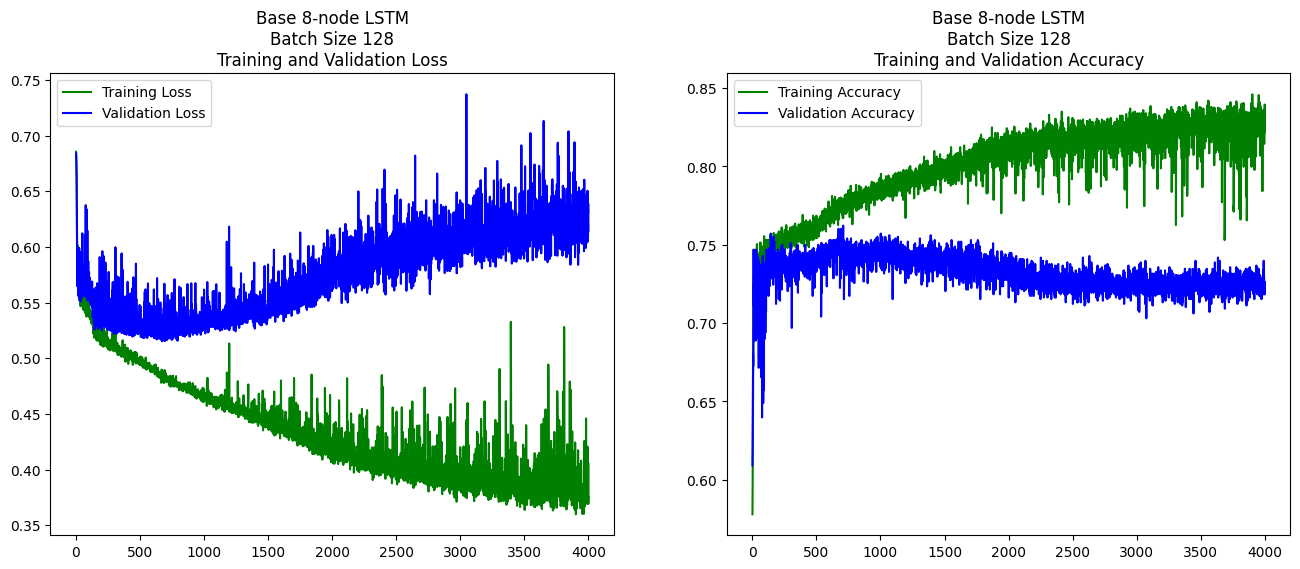

In [ ]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
for h in histories:
    for a_loss in h['loss']:
        train_loss.append(a_loss)
    for a_loss in h['val_loss']:
        val_loss.append(a_loss)
    for a_acc in h['acc']:
        train_acc.append(a_acc)
    for a_acc in h['val_acc']:
        val_acc.append(a_acc)
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Base 8-node LSTM\nBatch Size 128\nTraining and Validation Loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Base 8-node LSTM\nBatch Size 128\nTraining and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
print('validation loss = {:6.2f} at epoch = {:4d}'.format(min(val_loss), val_loss.index(min(val_loss))))
print('validation accuracy = {:6.2f}% at epoch = {:4d}'.format(max(val_acc) * 100, val_acc.index(max(val_acc))))

validation loss =   0.52 at epoch =  672
validation accuracy =  76.22% at epoch =  708


In [ ]:
from numpy.random import seed
seed(123)

from tensorflow.keras.layers import GRU

In [ ]:
model = Sequential()
model.add(GRU(16, recurrent_activation='sigmoid', dropout=0.2, recurrent_dropout=0.2, reset_after=True, input_shape=(None, X_train.shape[-1])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16)                1344      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
t1 = datetime.datetime.now()
print('Training start time = %s' %  t1)
history = model.fit(X_train, y_train,
                    batch_size=128,  epochs=500, verbose=0,
                    validation_data=(X_val, y_val), shuffle=True)
print('\nTraining Duration = %s' % (datetime.datetime.now()-t1))

Training start time = 2024-02-27 16:56:00.756925

Training Duration = 1:03:35.574089


In [ ]:
# histories = []  # only for first training session
histories.append(history.history)

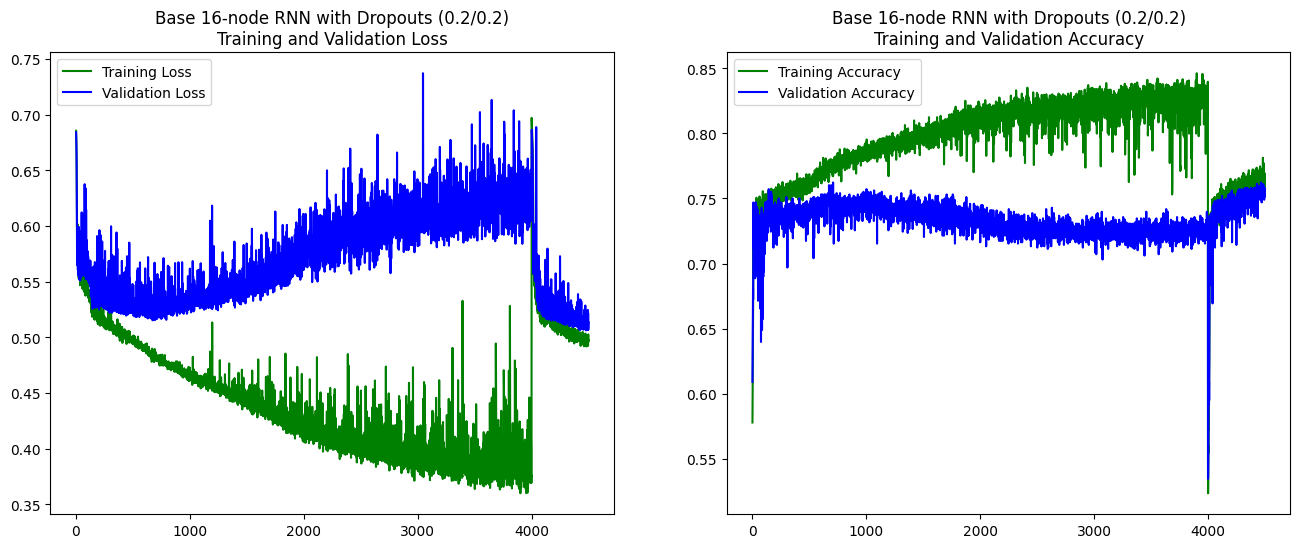

In [ ]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []

for history in histories:
    for a_loss in history['loss']:
        train_loss.append(a_loss)
    for a_loss in history['val_loss']:
        val_loss.append(a_loss)
    for a_acc in history['acc']:
        train_acc.append(a_acc)
    for a_val_acc in history['val_acc']:
        val_acc.append(a_val_acc)

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Base 16-node RNN with Dropouts (0.2/0.2)\nTraining and Validation Loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Base 16-node RNN with Dropouts (0.2/0.2)\nTraining and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
print('validation loss = {:6.2f} at epoch = {:4d}'.format(min(val_loss), val_loss.index(min(val_loss))))
print('validation accuracy = {:6.2f}% at epoch = {:4d}'.format(max(val_acc) * 100, val_acc.index(max(val_acc))))

validation loss =   0.51 at epoch = 4478
validation accuracy =  76.22% at epoch =  708


In [ ]:
import os
model.save(os.path.join('models', '/content/drive/MyDrive/DeployEnhancer/base-1x16gru-dropout0202.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
